In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report)

In [2]:
# pd.set_option('display.max_rows', 200)

In [3]:
def get_max_emotion_score_df(file, emotion_col, emotion_count_col):
    df = pd.read_csv(file)
    df[emotion_col] = df[['joy','sadness','anger','love','thankfulness','fear']].idxmax(axis=1)
    df[emotion_count_col] = df[emotion_col].groupby(df[emotion_col]).transform(emotion_count_col)
    return df

In [4]:
def display_bar_chart(df, emotion_col, emotion_count_col):
    emotions = df[emotion_col].unique()
    emotions_count = []
    for emotion in emotions:
        emotions_count.append(df[df[emotion_col]==emotion][:1][emotion_count_col].item())
    # for emotion, count in zip(emotions, emotions_count):
    #    print(f"{emotion}: {count}")
    data_tuples = list(zip(emotions, emotions_count))
    df = pd.DataFrame(data_tuples, columns=['emotions','count'])
    plt.figure(figsize=(10,5))
    g = sns.barplot(x='emotions', y='count', data=df.sort_values('emotions'))

## Original Dataset

In [5]:
og_df = pd.read_csv("data/peter_pan_labelled_novel_dataset.csv")
og_df["count"] = og_df["emotions"].groupby(og_df["emotions"]).transform("count")
og_df.head()

,text,emotions,count
0,on ordinary occasions the boys would have swum...,joy,25
1,"what is it? he cried, shrinking",fear,36
2,she drifted in one direction and he was borne ...,joy,25
3,"'thank you, peter.'",thankfulness,22
4,i don't want to go to school and learn solemn ...,thankfulness,22


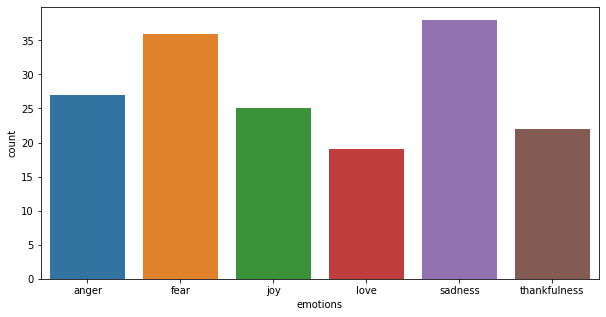

In [6]:
display_bar_chart(og_df, emotion_col="emotions", emotion_count_col="count")

## Predicted Dataset

In [7]:
df = pd.read_csv("results/peter_pan_emotions_041121_100151.csv")
df.head()

,text,joy,sadness,anger,love,thankfulness,fear
0,on ordinary occasions the boys would have swum...,0.740,0.924,0.091,0.353,0.374,0.228
1,"what is it? he cried, shrinking",0.297,0.226,0.943,0.835,0.778,0.100
2,she drifted in one direction and he was borne ...,0.362,0.503,0.267,0.568,0.953,0.133
3,"'thank you, peter.'",0.472,0.072,0.136,0.025,0.043,0.738
4,i don't want to go to school and learn solemn ...,0.537,0.546,0.603,0.690,0.218,0.456


In [8]:
df['emotions'] = df[['joy','sadness','anger','love','thankfulness','fear']].idxmax(axis=1)
df['count'] = df["emotions"].groupby(df["emotions"]).transform('count')

In [10]:
pred_df = get_max_emotion_score_df(file="results/peter_pan_emotions_041121_100151.csv",
                             emotion_col="emotions",
                             emotion_count_col="count")
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear,emotions,count
0,on ordinary occasions the boys would have swum...,0.740,0.924,0.091,0.353,0.374,0.228,sadness,31
1,"what is it? he cried, shrinking",0.297,0.226,0.943,0.835,0.778,0.100,anger,29
2,she drifted in one direction and he was borne ...,0.362,0.503,0.267,0.568,0.953,0.133,thankfulness,67
3,"'thank you, peter.'",0.472,0.072,0.136,0.025,0.043,0.738,fear,5
4,i don't want to go to school and learn solemn ...,0.537,0.546,0.603,0.690,0.218,0.456,love,21


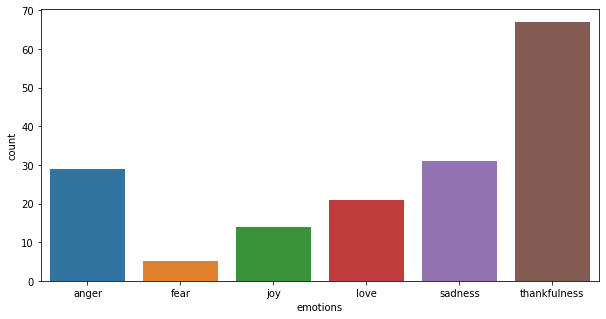

In [11]:
display_bar_chart(pred_df, emotion_col="emotions", emotion_count_col="count")

### Categorize Emotions column (Original dataset)

In [12]:
og_df.dtypes

text        object
emotions    object
count        int64
dtype: object

In [13]:
og_df["emotions"] = og_df["emotions"].astype('category')

In [14]:
category_dict = dict(sorted(zip(og_df.emotions.cat.codes, og_df.emotions)))

In [15]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 love
4 sadness
5 thankfulness


In [16]:
og_df.dtypes

text          object
emotions    category
count          int64
dtype: object

In [17]:
og_df["emotions_cat"] = og_df["emotions"].cat.codes
og_df.head()

,text,emotions,count,emotions_cat
0,on ordinary occasions the boys would have swum...,joy,25,2
1,"what is it? he cried, shrinking",fear,36,1
2,she drifted in one direction and he was borne ...,joy,25,2
3,"'thank you, peter.'",thankfulness,22,5
4,i don't want to go to school and learn solemn ...,thankfulness,22,5


### Categorize Emotions column (Predicted dataset)

In [18]:
pred_df.dtypes

text             object
joy             float64
sadness         float64
anger           float64
love            float64
thankfulness    float64
fear            float64
emotions         object
count             int64
dtype: object

In [19]:
pred_df["emotions"] = pred_df["emotions"].astype('category')

In [20]:
category_dict = dict(sorted(zip(pred_df.emotions.cat.codes, pred_df.emotions)))

In [21]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 love
4 sadness
5 thankfulness


In [22]:
pred_df.dtypes

text              object
joy              float64
sadness          float64
anger            float64
love             float64
thankfulness     float64
fear             float64
emotions        category
count              int64
dtype: object

In [23]:
pred_df["emotions_cat"] = pred_df["emotions"].cat.codes
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear,emotions,count,emotions_cat
0,on ordinary occasions the boys would have swum...,0.740,0.924,0.091,0.353,0.374,0.228,sadness,31,4
1,"what is it? he cried, shrinking",0.297,0.226,0.943,0.835,0.778,0.100,anger,29,0
2,she drifted in one direction and he was borne ...,0.362,0.503,0.267,0.568,0.953,0.133,thankfulness,67,5
3,"'thank you, peter.'",0.472,0.072,0.136,0.025,0.043,0.738,fear,5,1
4,i don't want to go to school and learn solemn ...,0.537,0.546,0.603,0.690,0.218,0.456,love,21,3


In [24]:
og_df.head()

,text,emotions,count,emotions_cat
0,on ordinary occasions the boys would have swum...,joy,25,2
1,"what is it? he cried, shrinking",fear,36,1
2,she drifted in one direction and he was borne ...,joy,25,2
3,"'thank you, peter.'",thankfulness,22,5
4,i don't want to go to school and learn solemn ...,thankfulness,22,5


In [25]:
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear,emotions,count,emotions_cat
0,on ordinary occasions the boys would have swum...,0.740,0.924,0.091,0.353,0.374,0.228,sadness,31,4
1,"what is it? he cried, shrinking",0.297,0.226,0.943,0.835,0.778,0.100,anger,29,0
2,she drifted in one direction and he was borne ...,0.362,0.503,0.267,0.568,0.953,0.133,thankfulness,67,5
3,"'thank you, peter.'",0.472,0.072,0.136,0.025,0.043,0.738,fear,5,1
4,i don't want to go to school and learn solemn ...,0.537,0.546,0.603,0.690,0.218,0.456,love,21,3


## Confusion Matrix

In [26]:
confusion = confusion_matrix(og_df["emotions_cat"], pred_df["emotions_cat"])

In [27]:
confusion

array([[ 7,  0,  3,  4,  6,  7],
       [ 7,  0,  4,  4,  7, 14],
       [ 3,  2,  2,  3,  3, 12],
       [ 3,  1,  2,  2,  4,  7],
       [ 6,  1,  2,  3,  8, 18],
       [ 3,  1,  1,  5,  3,  9]], dtype=int64)

In [28]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    """
    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix by sklearn.metrics.confusion_matrix 
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(
        accuracy, misclass))
    plt.show()

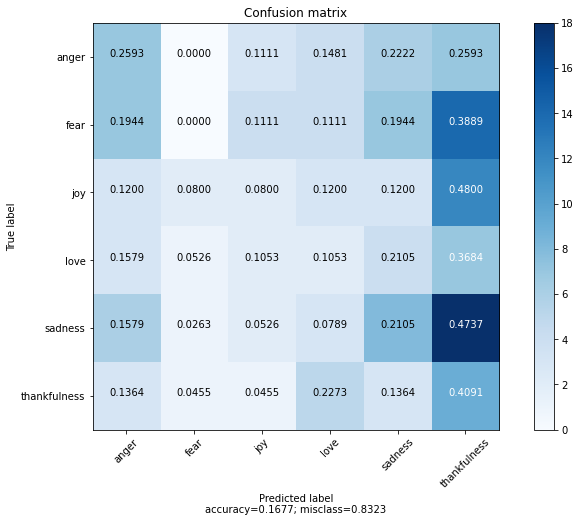

In [29]:
target_names = []
for k, v in category_dict.items(): target_names.append(v)
plot_confusion_matrix(cm=confusion, target_names=target_names, title='Confusion matrix')

### Precision-Recall Report
<div>
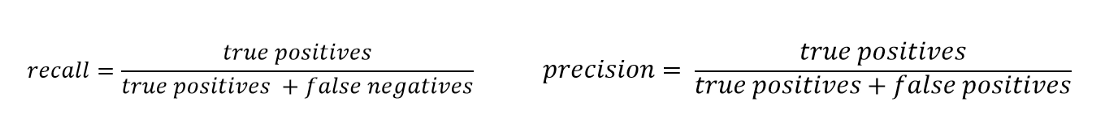
</div>

In [30]:
classes = []
for k, v in category_dict.items(): classes.append(v)
classes

['anger', 'fear', 'joy', 'love', 'sadness', 'thankfulness']

In [31]:
print(classification_report(og_df["emotions_cat"], pred_df["emotions_cat"], target_names=classes))

              precision    recall  f1-score   support

       anger       0.24      0.26      0.25        27
        fear       0.00      0.00      0.00        36
         joy       0.14      0.08      0.10        25
        love       0.10      0.11      0.10        19
     sadness       0.26      0.21      0.23        38
thankfulness       0.13      0.41      0.20        22

    accuracy                           0.17       167
   macro avg       0.15      0.18      0.15       167
weighted avg       0.15      0.17      0.15       167

